# 선형-비선형 관계를 가진 데이터 생성 및 분석 연습

선형 비선형 데이터를 군집화해보고 PCA를 통해 차원축소하여 분류에 용이하게 전처리하는 연습을 진행하였다.

FastCampus의 강의해설을 듣고 진행하였다. (https://www.fastcampus.co.kr/data_online_dl300) 

### 라이브러리 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification

## 데이터 생성 및 K-Means Clustering 적용

In [5]:
X1, y1 = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, 
                            n_clusters_per_class=1,n_classes=2,class_sep=3, random_state=4)
X1[:,1] = (X1[:,0] + X1[:,1])/ 2 #상관관계를 만들어줌.
rng = np.random.RandomState(2)
X1 += 2*rng.uniform(size=X1.shape)

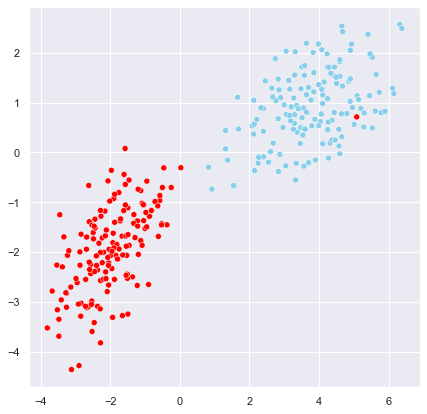

In [6]:
color_code = {0:'Red', 1:'Skyblue'}
plt.figure(figsize=(7, 7))
sns.scatterplot(x=X1[:,0], y=X1[:,1], c=[color_code.get(i) for i in y1])
plt.show()

In [8]:
np.random.seed(1)
def CircleXY(r, n, sigma):
    theta = np.random.uniform(low=0, high=2*np.pi, size=n)
    x_error = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_error = np.random.normal(loc=0.0, scale=sigma, size=n)
   
    x_val = r*np.cos(theta) + x_error
    y_val = r*np.sin(theta) + y_error
    return x_val, y_val, np.repeat(r,n)

In [13]:
n = 200
r_list = [1, 3, 5] # 반지름
sigma = 0.2 # sigma
param_lists = [(r, n , sigma) for r in r_list] # 반지름 3개 해당하는 튜플 만들기

coordinates = [ CircleXY(param[0], param[1], param[2]) for param in param_lists]
color_code = {1: 'Orange', 3:'Green', 5:'Purple'}

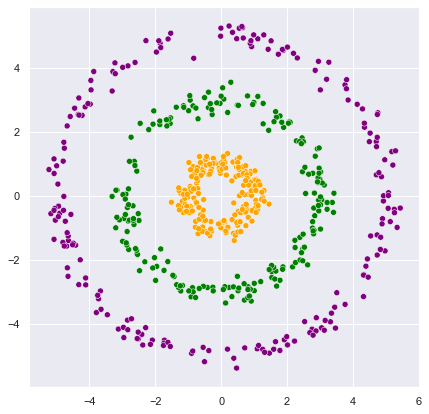

In [14]:
plt.figure(figsize=(7,7))

for j in range(0, len(coordinates)):
    x,y,group = coordinates[j]
    sns.scatterplot(x=x, y=y, c=[color_code.get(i) for i in group])
    
plt.show()

In [110]:
# 데이터 정리

X_1, X_2, y_2_bf = [np.append(np.append(coordinates[0][i],coordinates[1][i]),coordinates[2][i]) for i in range(0,3)]
X2 = np.c_[X_1, X_2]

mapping_dic = {1:0, 3:1, 5:2}
y_2_bf2 = [mapping_dic.get(i) for i in y_2_bf] # 반지름 1,3,5 를 0,1,2 라벨링

y_2 = np.array(y_2_bf2)

## 선형 데이터의 경우

### K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3, random_state=1)
km.fit(X1)

centers = km.cluster_centers_
y_km = km.labels_

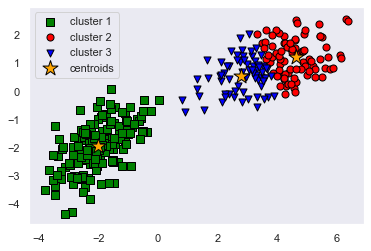

In [24]:
plt.scatter(
    X1[y_km == 0, 0 ], X1[y_km == 0, 1],
    s=50, c='Green',
    marker='s',edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X1[y_km == 1, 0 ], X1[y_km == 1, 1],
    s=50, c='Red',
    marker='o',edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X1[y_km == 2, 0 ], X1[y_km == 2, 1],
    s=50, c='Blue',
    marker='v',edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:,1],
    s= 250, marker='*',
    c='orange', edgecolor='black',
    label = 'centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
# 정보가 들어 있다.

centers = km.cluster_centers_
y_km = km.labels_

- '비지도학습'의경우 몇 개의 클래스가 있는지 정확히 모를 수 있다. 그럴경우 최적의 K를 어떻게 찾는가의 문제를 풀어야 한다.

In [26]:
distortions = []
for i in range(1, 11):
    km=KMeans(n_clusters=i, random_state=1)
    km.fit(X1)
    distortions.append(km.inertia_)

In [27]:
distortions

[3631.3474983793994,
 489.66249568652876,
 348.7751472702892,
 238.49845773319169,
 198.48851891831458,
 165.49884308316967,
 142.37533454699883,
 126.99685496850064,
 112.52341201145697,
 100.87291006012964]

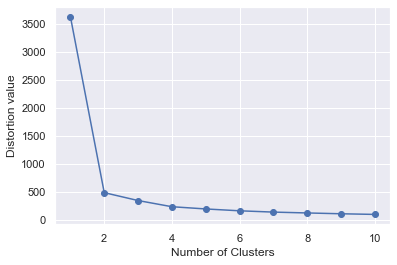

In [28]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion value')
plt.show()

- 군집간의 거리 대비 군집내 샘플들사이의 거리가 작을때 숫자가 작아지게 됨. 
- 그러나 군집수가 많아질수록 숫자는 작아지는게 디폴트이므로 Elbow Method를 통해 군집 수 파악
- Elbow Method : 군집 수가 늘어남 대비 Distortion이 많이 줄었을때 끊어주는 방법. (군집 수를 늘렸지만 Distortion이 늘지 않는 지점 전에서 끊어야 한다. - 기울기가 완만해지는지점)
- 위의 경우는 2

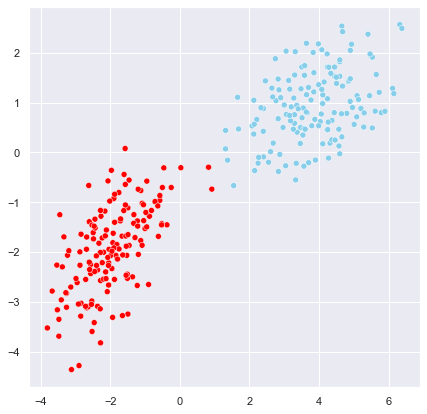

In [29]:
color_code = {0:'Red', 1:'Skyblue'}
plt.figure(figsize=(7, 7))

km=KMeans(n_clusters=2, random_state=4)
km.fit(X1)
y_km = km.labels_

sns.scatterplot(x=X1[:,0], y=X1[:,1], c=[color_code.get(i) for i in y_km ])

plt.show()

- 아웃라이어 하나와 경계 근처의 두 개의 값을 제하고 잘 분류하는 것을 볼 수 있다.

## PCA 이용

In [30]:
mX = X1
for i in range(X1.shape[1]):
    mX[:, i] = mX[:, i] - np.mean(X1[:, i])

- 공분산행렬 (각 Feature의 변동이 얼마나 닮았는지) \
평균값을 빼주면 각 컬럼(변수)의 평균은 0이 된다. 또한 평균을 뺀 **남은 값들은 '평균에서 얼마나 떨어져 있는지'가 된다.** \
대각행렬은 따라서 분산처럼 되는것이고 n-1을 나누어주면 분산값이 된다.  나머지 행렬은 공분산처럼 되는것이고 n-1을 나누어주면 공분산값이 된다. \
따라서 mX의 평균값을 빼준다면 mX의 Quadratic 형태(mX.T * mX)가 공분산의 상수배가 된다.

In [39]:
A = np.cov(mX.transpose()) # 공분산행렬

aU, aD, aV = np.linalg.svd(A) # 특이값 분해

In [40]:
XV = np.dot(mX, aV) #PC Score

V = 공분산행렬(A.T * A)의 eigen vecotrs가 되고 D제곱은 공분산행렬의 eigen values가 된다. \
A.T * A = V(D의제곱)V.T가 되는데 이는 곧 "A.T * A * V = V(D의제곱)"이 된다. \
\
분산행렬의 고유벡터  = 오른쪽 특이벡터 중 가장 첫번째 \
기존행렬과 분산행렬의고유벡터를 곱한것은 PC Score라 한다.

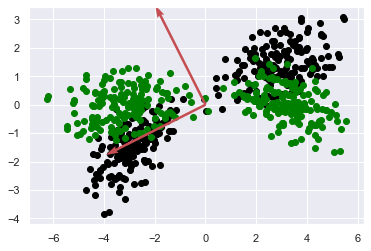

In [43]:
plt.scatter(mX[:,0], mX[:,1], color="black")
plt.scatter(XV[:,0], XV[:,1], color="green")
origin = (0, 0)
plt.quiver(origin[0],origin[1], aV[0,0], aV[1,0], color=['r','b'], scale=3)
plt.quiver(origin[0],origin[1], aV[0,1], aV[1,1], color=['r','b'], scale=3)
plt.show()

원래 데이터 우상향. 공분산행렬의 대각행렬이 양수 \
공분산행렬을 곱하는 것은 데이터들을 늘려주는 것. \
타원의 장축과 단축으로도 생각할 수 있고 데이터가 늘어나는 주된 방향 하나와 그에 직교하는 방향을 표시 \
\
PC Score는 데이터가 원래 가진 선형적인 특성을 제거한다.

### PCA 진행 및 결과 해석

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA()
pca.fit(X1)

PCscore = pca.transform(X1)

In [47]:
print(PCscore[0:3, :])
print(XV[0:3, :])

[[-4.30530095  1.07772928]
 [ 2.62041378  0.29365246]
 [-4.36105033  0.71700833]]
[[ 4.30530095 -1.07772928]
 [-2.62041378 -0.29365246]
 [ 4.36105033 -0.71700833]]


In [48]:
eigens_v = pca.components_.transpose()
print(eigens_v)
print(aV)

[[ 0.89264091  0.45076847]
 [ 0.45076847 -0.89264091]]
[[-0.89264091 -0.45076847]
 [-0.45076847  0.89264091]]


In [49]:
print(pca.explained_variance_)
print(aD)

[11.74986536  0.39510955]
[11.74986536  0.39510955]


X1을 transform한 PCscore와 위의 XV값이 동일(방향은 반대)하다는 것을 확인할 수 있다. \
고유벡터와 aV와 동일함을 알 수 있다.\
고유값과 aD와 동일함을 알 수 있다.

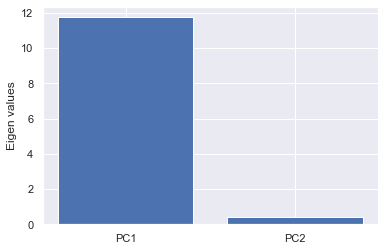

In [51]:
label = ['PC1', 'PC2']
index = np.arange(len(label))

plt.bar(index, pca.explained_variance_)
plt.ylabel('Eigen values')
plt.xticks(index, label)
plt.show()

PC1 선형을 가장 잘 설명하는 방향. 사실 이부분만 챙겨도 된다.

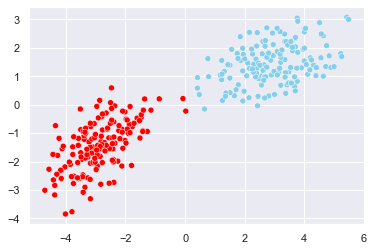

In [53]:
PC1_matrix=np.matrix(PCscore[:,0]).transpose()

km = KMeans(n_clusters=2, random_state=4)
km.fit(PC1_matrix)
y_km=km.labels_

sns.scatterplot(x=X1[:,0], y=X1[:,1], c=[color_code.get(i) for i in y_km ])
plt.show()

차원 축소후 클러스터링

## 비선형 관계 데이터의 경우

### 단순 클러스터링과 PCA 적용

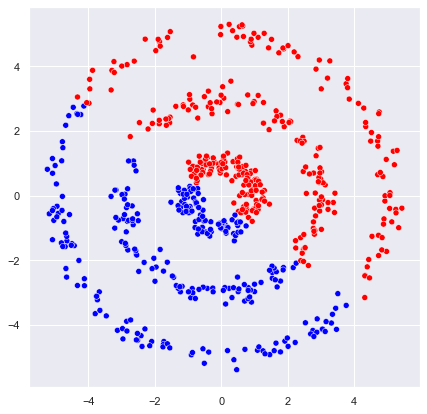

In [63]:
color_code = {0: 'red', 1: 'blue'}
plt.figure(figsize=(7,7))

km=KMeans(n_clusters=2, random_state=4)
km.fit(X2)
y_km = km.labels_

sns.scatterplot(x=X2[:,0], y=X2[:,1], c=[color_code.get(i) for i in y_km])
plt.show()

단순히 거리개념(점사이의 거리)으로 계산하여 분류한다면 첫번째원과 두번째 원을 정확히 분류해낼 수 없는 문제점이 있다.\
커널 개념을 사용할 필요가 있다.

C:\Users\dissi\anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dissi\anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


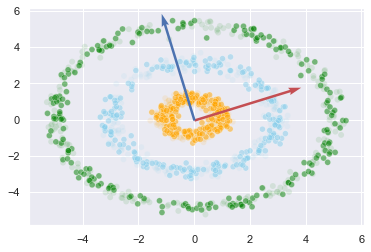

In [66]:
pca = PCA()
pca.fit(X2)
eigens_v = pca.components_.transpose()
PCscore=pca.transform(X2)
color_code = {0:'Orange', 1:'Skyblue', 2:'Green'}

mX = X2
for i in range(X2.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(mX[:,i])


sns.scatterplot(mX[:,0], mX[:,1], c=[color_code.get(i) for i in y_2], alpha = 0.1)
sns.scatterplot(PCscore[:,0], PCscore[:,1], c=[color_code.get(i) for i in y_2], alpha = 0.5)

origin = (0,0)
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color='r', scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color='b', scale=3)


원형이므로 큰 의미가 없다. (축으로 이동하는 것인데 원형구도이므로 큰 의미가 없는 것.)\
비선형 관계는 단순 군집과 단순 PCA는 큰 의미가 없다.

### 다른 비선형 데이터의 예

#### 반원형

In [67]:
from sklearn.datasets import make_moons

X3, y3 = make_moons(n_samples=300, random_state=4)

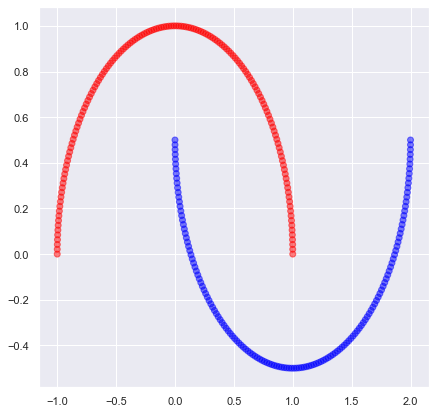

In [69]:
plt.figure(figsize=(7,7))
color_code = {0: 'red', 1:'blue'}

plt.scatter(X3[:,0], X3[:,1], c=[color_code.get(i) for i in y3], alpha=0.5)
plt.show()

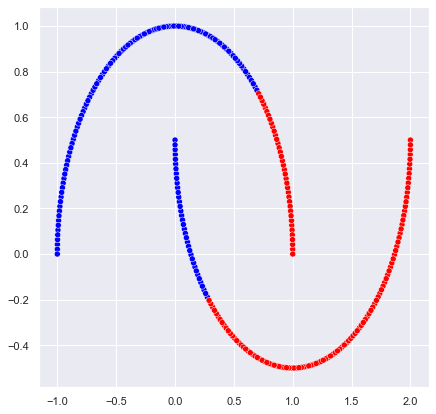

In [70]:
color_code = {0: 'red', 1: 'blue'}
plt.figure(figsize=(7,7))

km=KMeans(n_clusters=2, random_state=4)
km.fit(X3)
y_km = km.labels_

sns.scatterplot(x=X3[:,0], y=X3[:,1], c=[color_code.get(i) for i in y_km])
plt.show()

C:\Users\dissi\anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dissi\anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


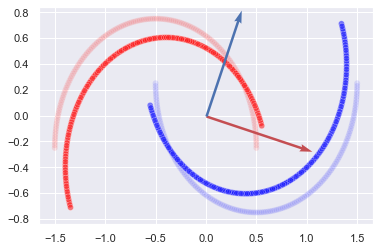

In [71]:
pca = PCA()
pca.fit(X3)
eigens_v = pca.components_.transpose()
PCscore=pca.transform(X3)
color_code = {0:'red', 1:'blue'}

mX = X3
for i in range(X3.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(mX[:,i])

plt.figure(figsize=(7,7))
    
sns.scatterplot(mX[:,0], mX[:,1], c=[color_code.get(i) for i in y3], alpha = 0.1)
sns.scatterplot(PCscore[:,0], PCscore[:,1], c=[color_code.get(i) for i in y3], alpha = 0.5)

origin = (0,0)
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color='r', scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color='b', scale=3)


제대로 분리해내지 못함. KMeans와 마찬가지로 PCA도 제대로 분류해내지 못한다.

#### 나선형

In [72]:
!pip install git+https://github.com/lovit/synthetic_dataset

  Cloning https://github.com/lovit/synthetic_dataset to c:\users\public\documents\estsoft\creatortemp\pip-req-build-8r2a615m
  Created wheel for soydata: filename=soydata-0.1.0-py3-none-any.whl size=20175 sha256=d848563d36333f112314c270384a4b7a958944d1b0bda6394fcbd2d8eb7857df
  Stored in directory: C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-ephem-wheel-cache-c1b9wy6p\wheels\42\28\7e\22497b8e34e6380a75109acea1def2407cb8045873af5a2daa
Successfully built soydata


  Running command git clone -q https://github.com/lovit/synthetic_dataset 'C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-req-build-8r2a615m'


In [73]:
from soydata.data import *

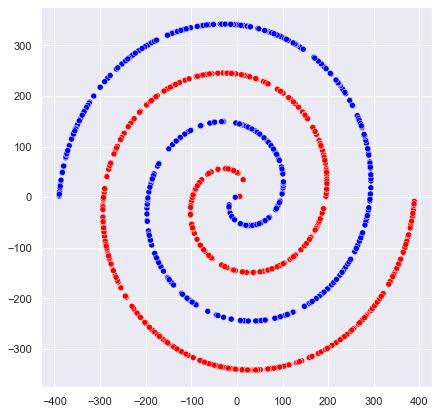

In [75]:
X4, y4 = classification.make_spiral(n_samples_per_class=500, n_classes=2,n_rotations=2, gap_between_spiral=30, noise=0.05)

plt.figure(figsize=(7,7))
color_code = {0:'red', 1:'blue'}

sns.scatterplot(x=X4[:,0], y=X4[:,1], c=[color_code.get(i) for i in y4])
plt.show()

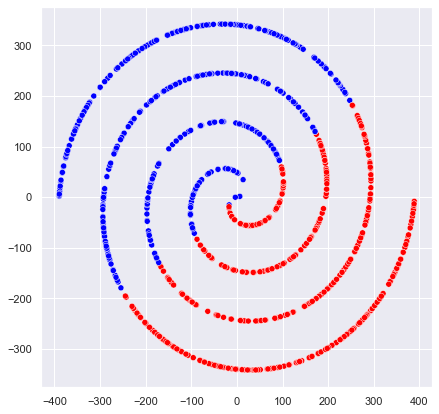

In [76]:
color_code = {0: 'red', 1: 'blue'}
plt.figure(figsize=(7,7))

km=KMeans(n_clusters=2, random_state=4)
km.fit(X4)
y_km = km.labels_

sns.scatterplot(x=X4[:,0], y=X4[:,1], c=[color_code.get(i) for i in y_km])
plt.show()

C:\Users\dissi\anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\dissi\anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



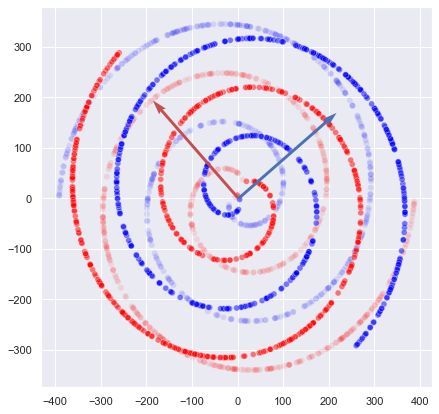

In [77]:
pca = PCA()
pca.fit(X4)
eigens_v = pca.components_.transpose()
PCscore=pca.transform(X4)
color_code = {0:'red', 1:'blue'}

mX = X4
for i in range(X4.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(mX[:,i])

plt.figure(figsize=(7,7))
    
sns.scatterplot(mX[:,0], mX[:,1], c=[color_code.get(i) for i in y4], alpha = 0.1)
sns.scatterplot(PCscore[:,0], PCscore[:,1], c=[color_code.get(i) for i in y4], alpha = 0.5)

origin = (0,0)
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color='r', scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color='b', scale=3)

나선형 데이터의경우도 단순 clustering의 경우 제대로 분류해내지 못하며 PCA역시 단순 회전만 한 모습을 확인할 수 있다.

## Kernel PCA (비선형데이터)

비선형 데이터를 선형데이터로, PCA 및 클러스터링 가능하게\
데이터의 특성에 맞게 맞는 Kernel 을 사용해 주어야 한다.

#### Gaussian kernel PCA

In [78]:
from sklearn.decomposition import KernelPCA

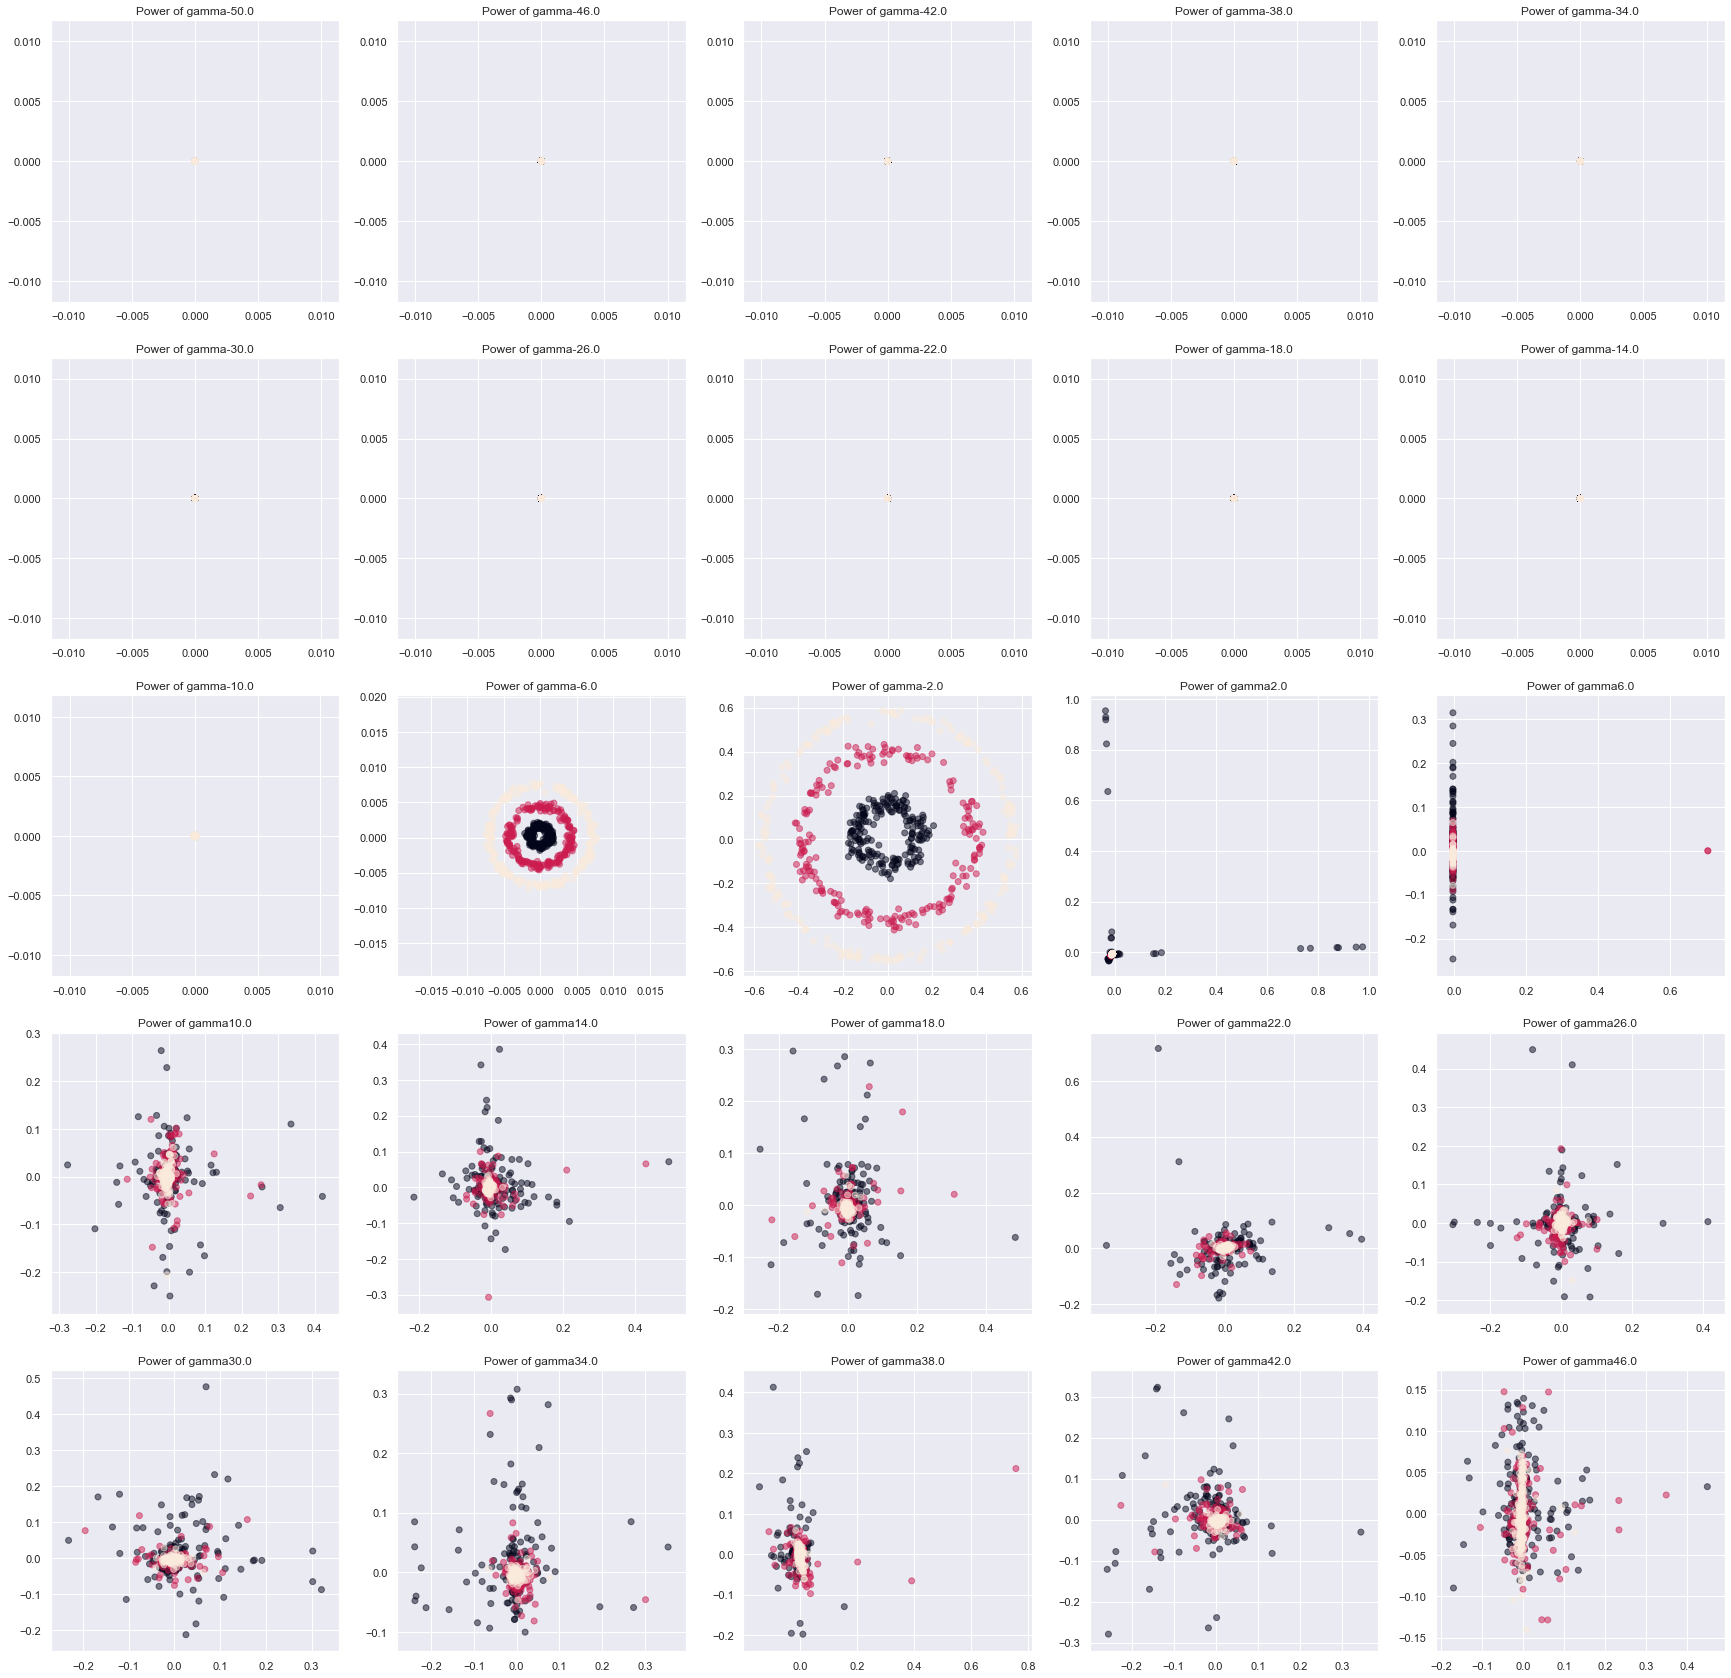

In [83]:
g_start = -50
g_end = 50
g_power = np.arange(g_start, g_end, (g_end - g_start)/25)

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30), sharex=False, sharey=False)

for n, ax in enumerate (axs.flatten()):
    g_value = 10 ** g_power[n]
    scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=g_value)
    X_skernpca = scikit_kpca.fit_transform(X2)
    ax.scatter(X_skernpca[:,0], X_skernpca[:,1], c=y_2, alpha=0.5)
    ax.set_title('Power of gamma' + str(g_power[n]), size = 12)

감마의 범위 : 감마가 작으면 분산이 크고 감마가 크면 분산이 작다. \
감마가 너무 크거나 작으면 패턴이 없거나 분류하지 못하는 경우가 생긴다.

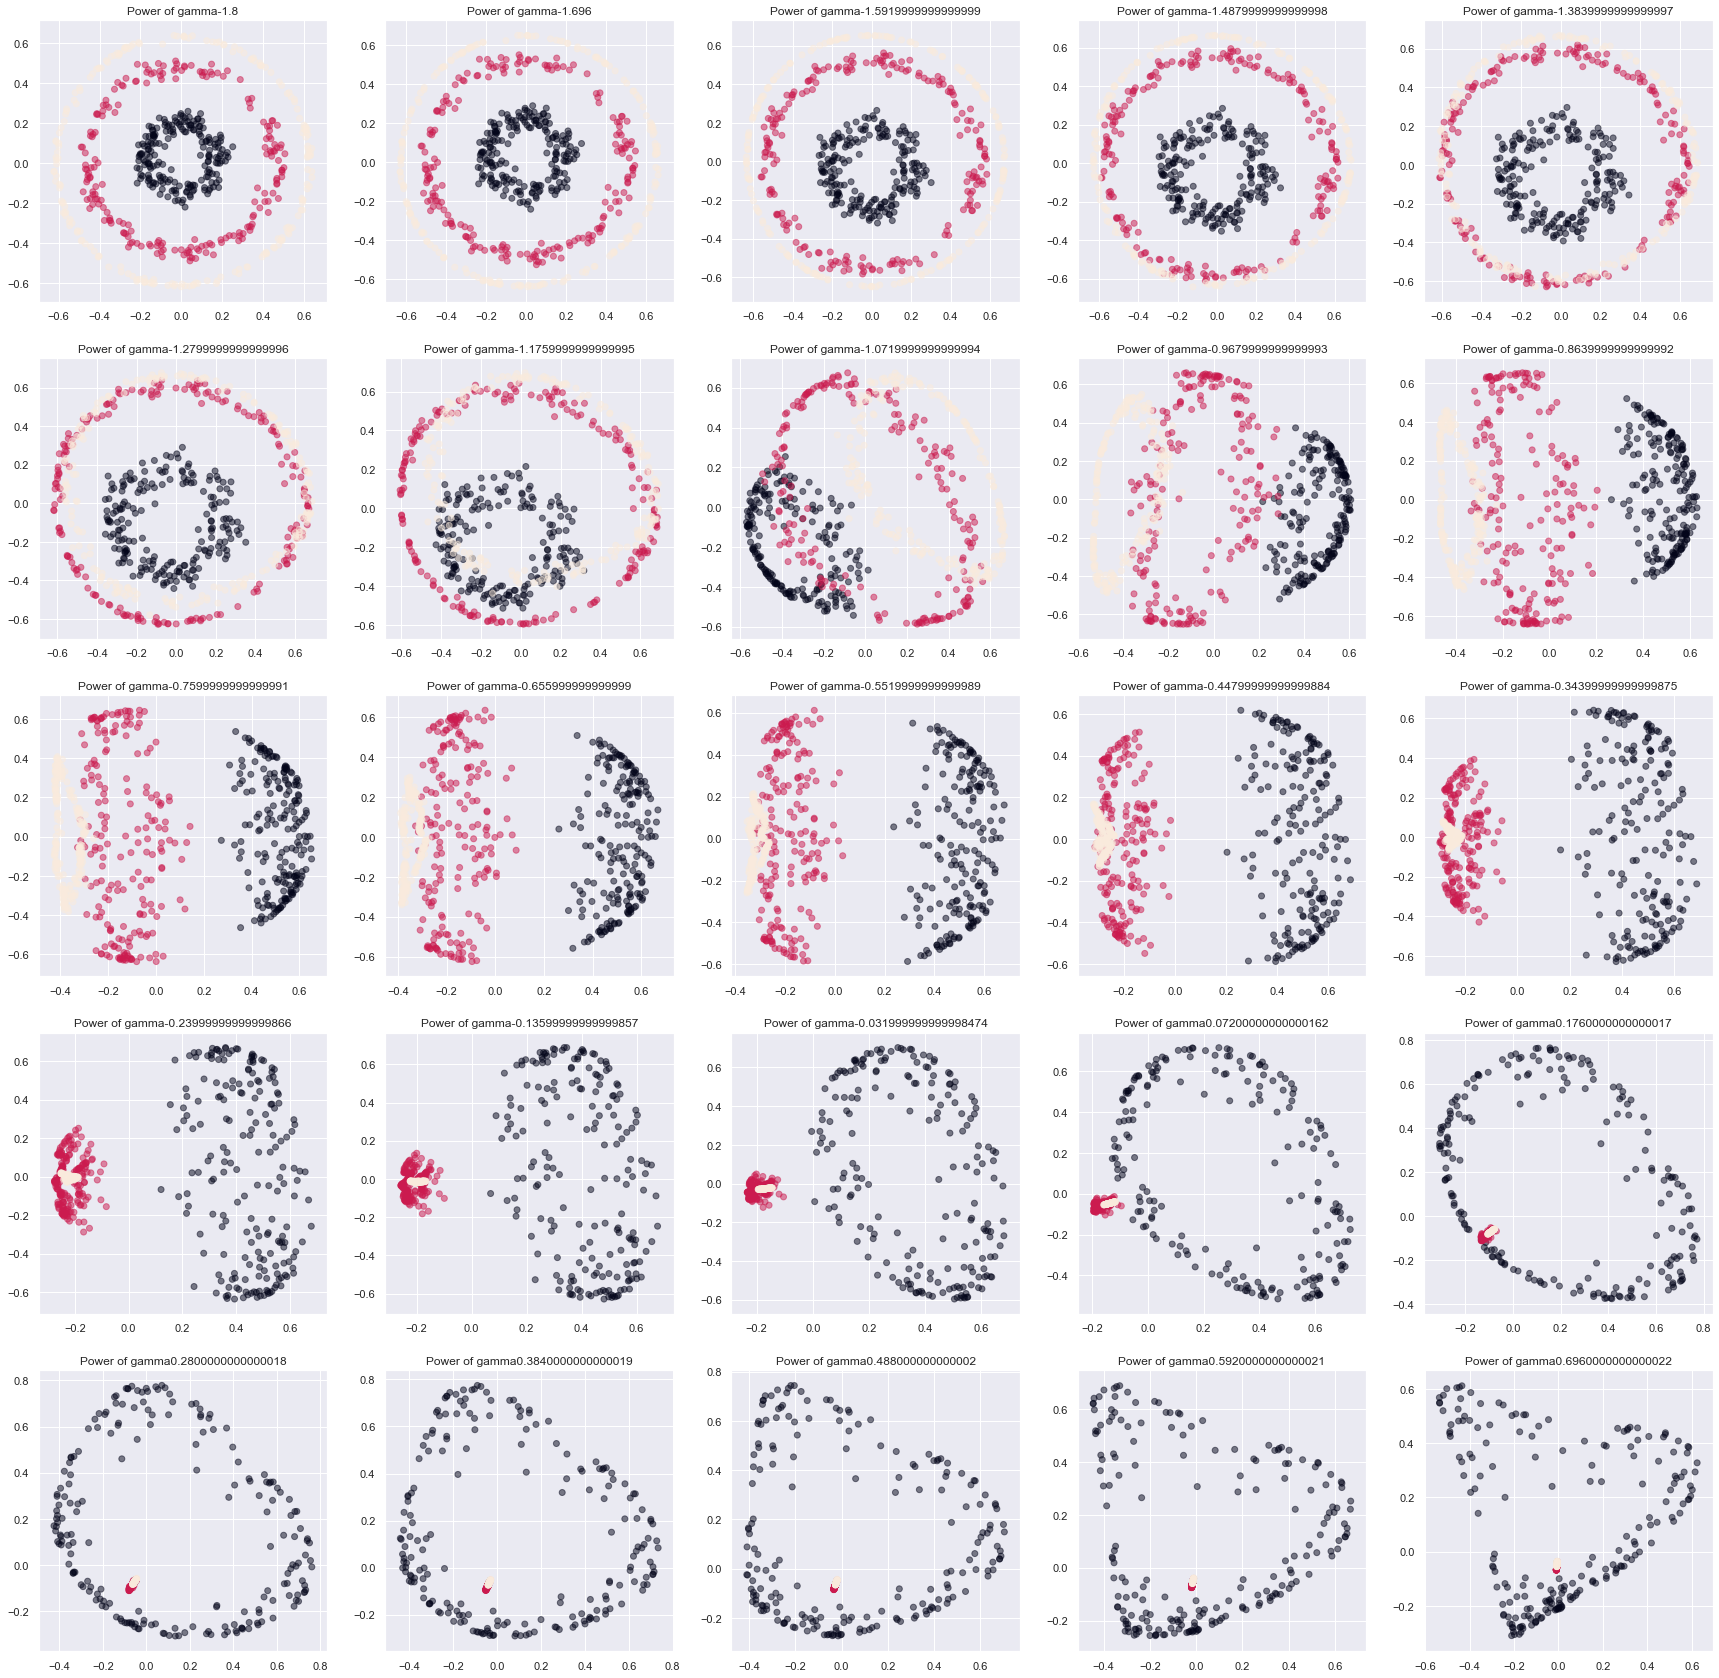

In [92]:
g_start = -1.8
g_end = 0.8
g_power = np.arange(g_start, g_end, (g_end - g_start)/25)

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30), sharex=False, sharey=False)

for n, ax in enumerate (axs.flatten()):
    g_value = 10 ** g_power[n]
    scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=g_value)
    X_skernpca = scikit_kpca.fit_transform(X2)
    ax.scatter(X_skernpca[:,0], X_skernpca[:,1], c=y_2, alpha=0.5)
    ax.set_title('Power of gamma' + str(g_power[n]), size = 12)

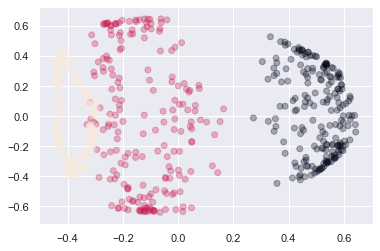

In [93]:
g_power_val = -0.8
g_value = 10**g_power_val
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=g_value)
X_skernpca = scikit_kpca.fit_transform(X2)

plt.scatter(X_skernpca[:,0], X_skernpca[:,1], c=y_2, alpha=0.3)
plt.show()

#### Polynomial kernel PCA

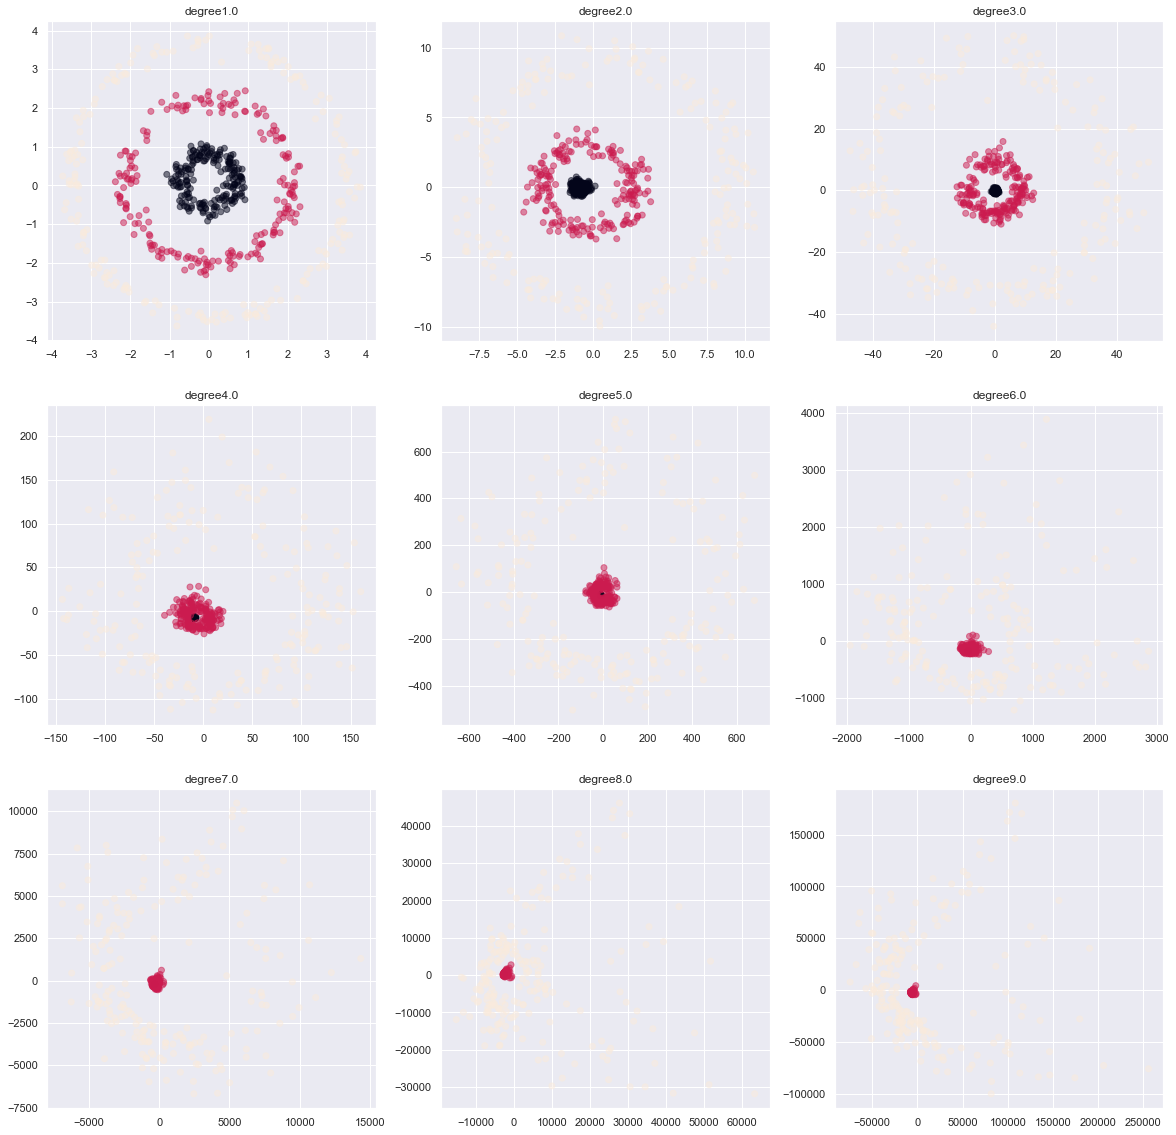

In [103]:
g_start = 1
g_end = 10
g_power = np.arange(g_start, g_end, (g_end - g_start)/9)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=False, sharey=False)

for n, ax in enumerate (axs.flatten()):
    g_value = 10 ** (g_power[n])
    scikit_kpca = KernelPCA(n_components=2, kernel='poly', degree=g_power[n])
    X_skernpca = scikit_kpca.fit_transform(X2)
    ax.scatter(X_skernpca[:,0], X_skernpca[:,1], c=y_2, alpha=0.5)
    ax.set_title('degree' + str(g_power[n]), size = 12)

Polynomial 로는 불가능

#### X3, 반달모양에 대해서

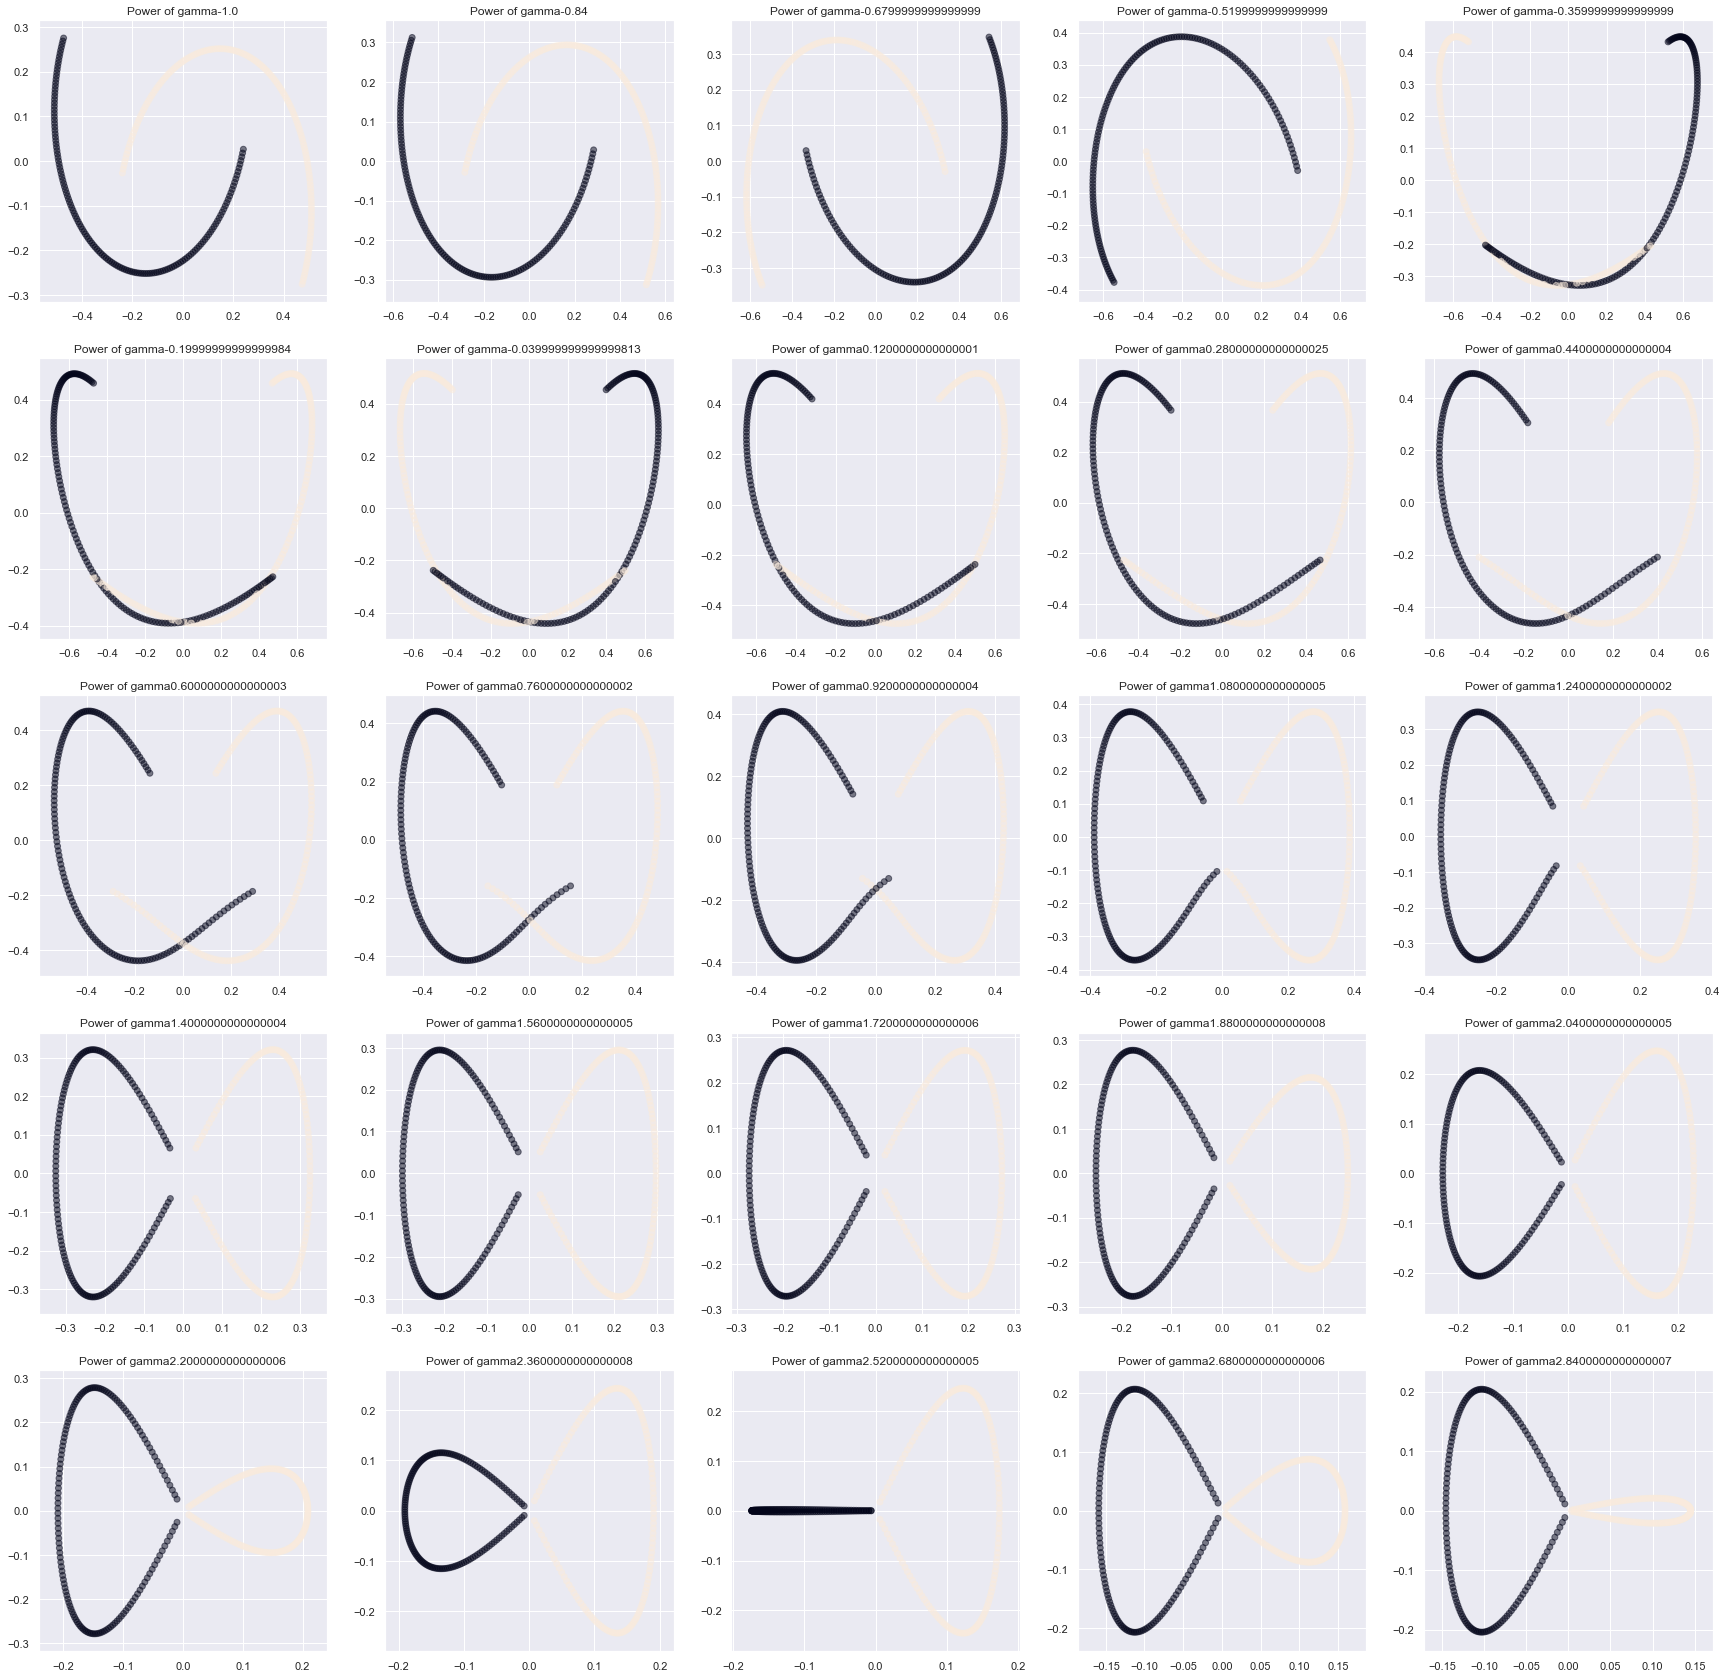

In [114]:
g_start = -1
g_end = 3
g_power = np.arange(g_start, g_end, (g_end - g_start)/25)

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30), sharex=False, sharey=False)

for n, ax in enumerate (axs.flatten()):
    g_value = 10 ** g_power[n]
    scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=g_value)
    X_skernpca = scikit_kpca.fit_transform(X3)
    ax.scatter(X_skernpca[:,0], X_skernpca[:,1], c=y3, alpha=0.5)
    ax.set_title('Power of gamma' + str(g_power[n]), size = 12)

Gaussian 모델일경우 Gamma가 1.4일때 x축에 대하여 data를 잘 분리할 수 있음을 확인할 수 있다.

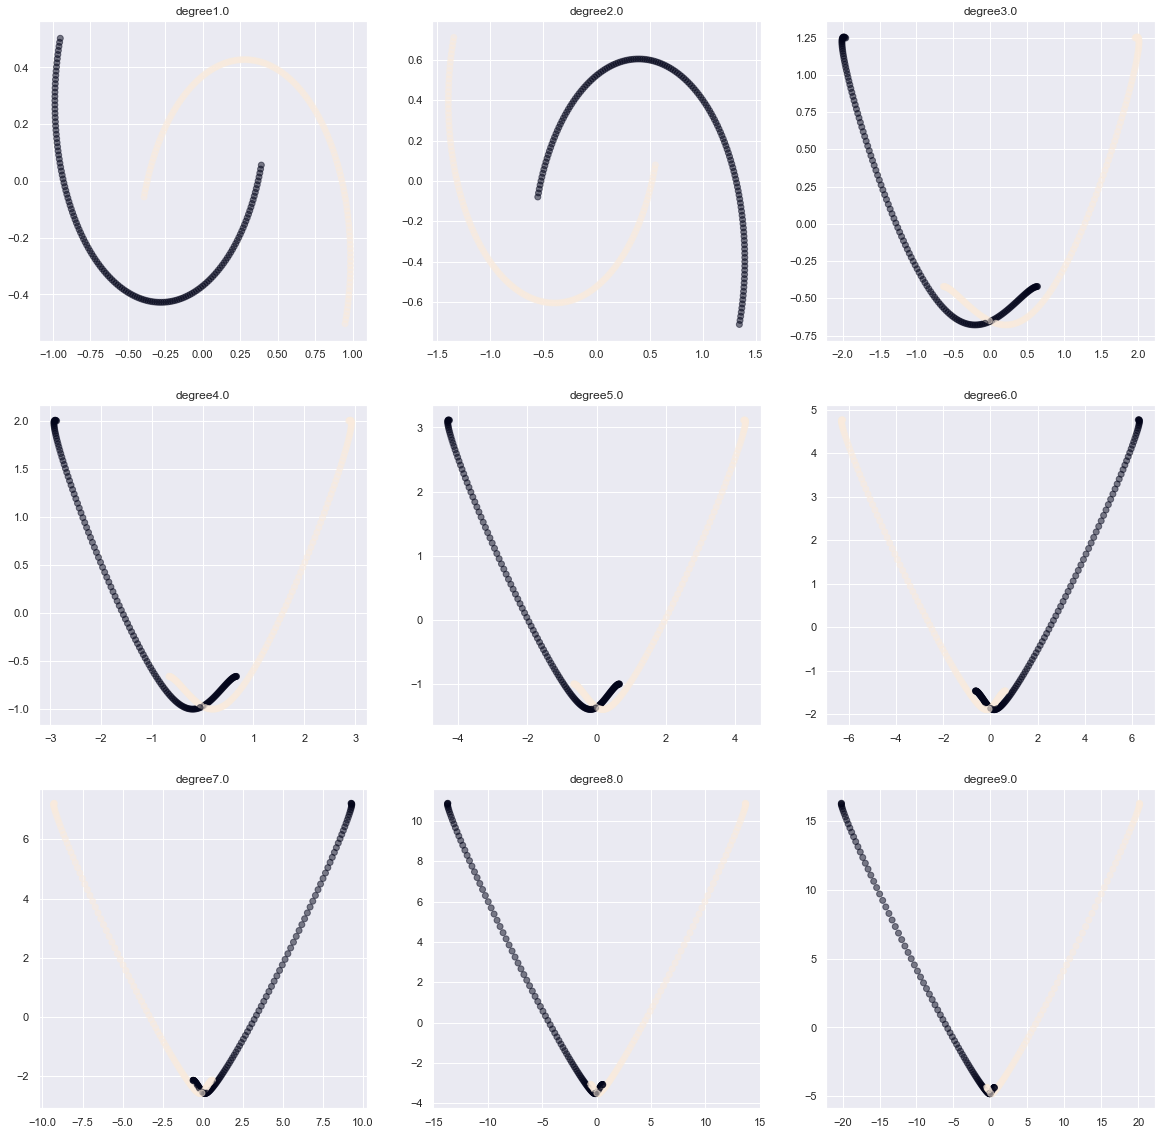

In [115]:
g_start = 1
g_end = 10
g_power = np.arange(g_start, g_end, (g_end - g_start)/9)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=False, sharey=False)

for n, ax in enumerate (axs.flatten()):
    g_value = 10 ** (g_power[n])
    scikit_kpca = KernelPCA(n_components=2, kernel='poly', degree=g_power[n])
    X_skernpca = scikit_kpca.fit_transform(X3)
    ax.scatter(X_skernpca[:,0], X_skernpca[:,1], c=y3, alpha=0.5)
    ax.set_title('degree' + str(g_power[n]), size = 12)

 선형화 제대로 하지 못함. 언뜻 잘 구분되어 보이나 뭉쳐진 지점이 있고 그 부분에 무게중심이 가있기 때문에 진행후 Clustering을 진행한다면 제대로 분류해낼 수 없다.

#### X4, 나선모양에 대해서

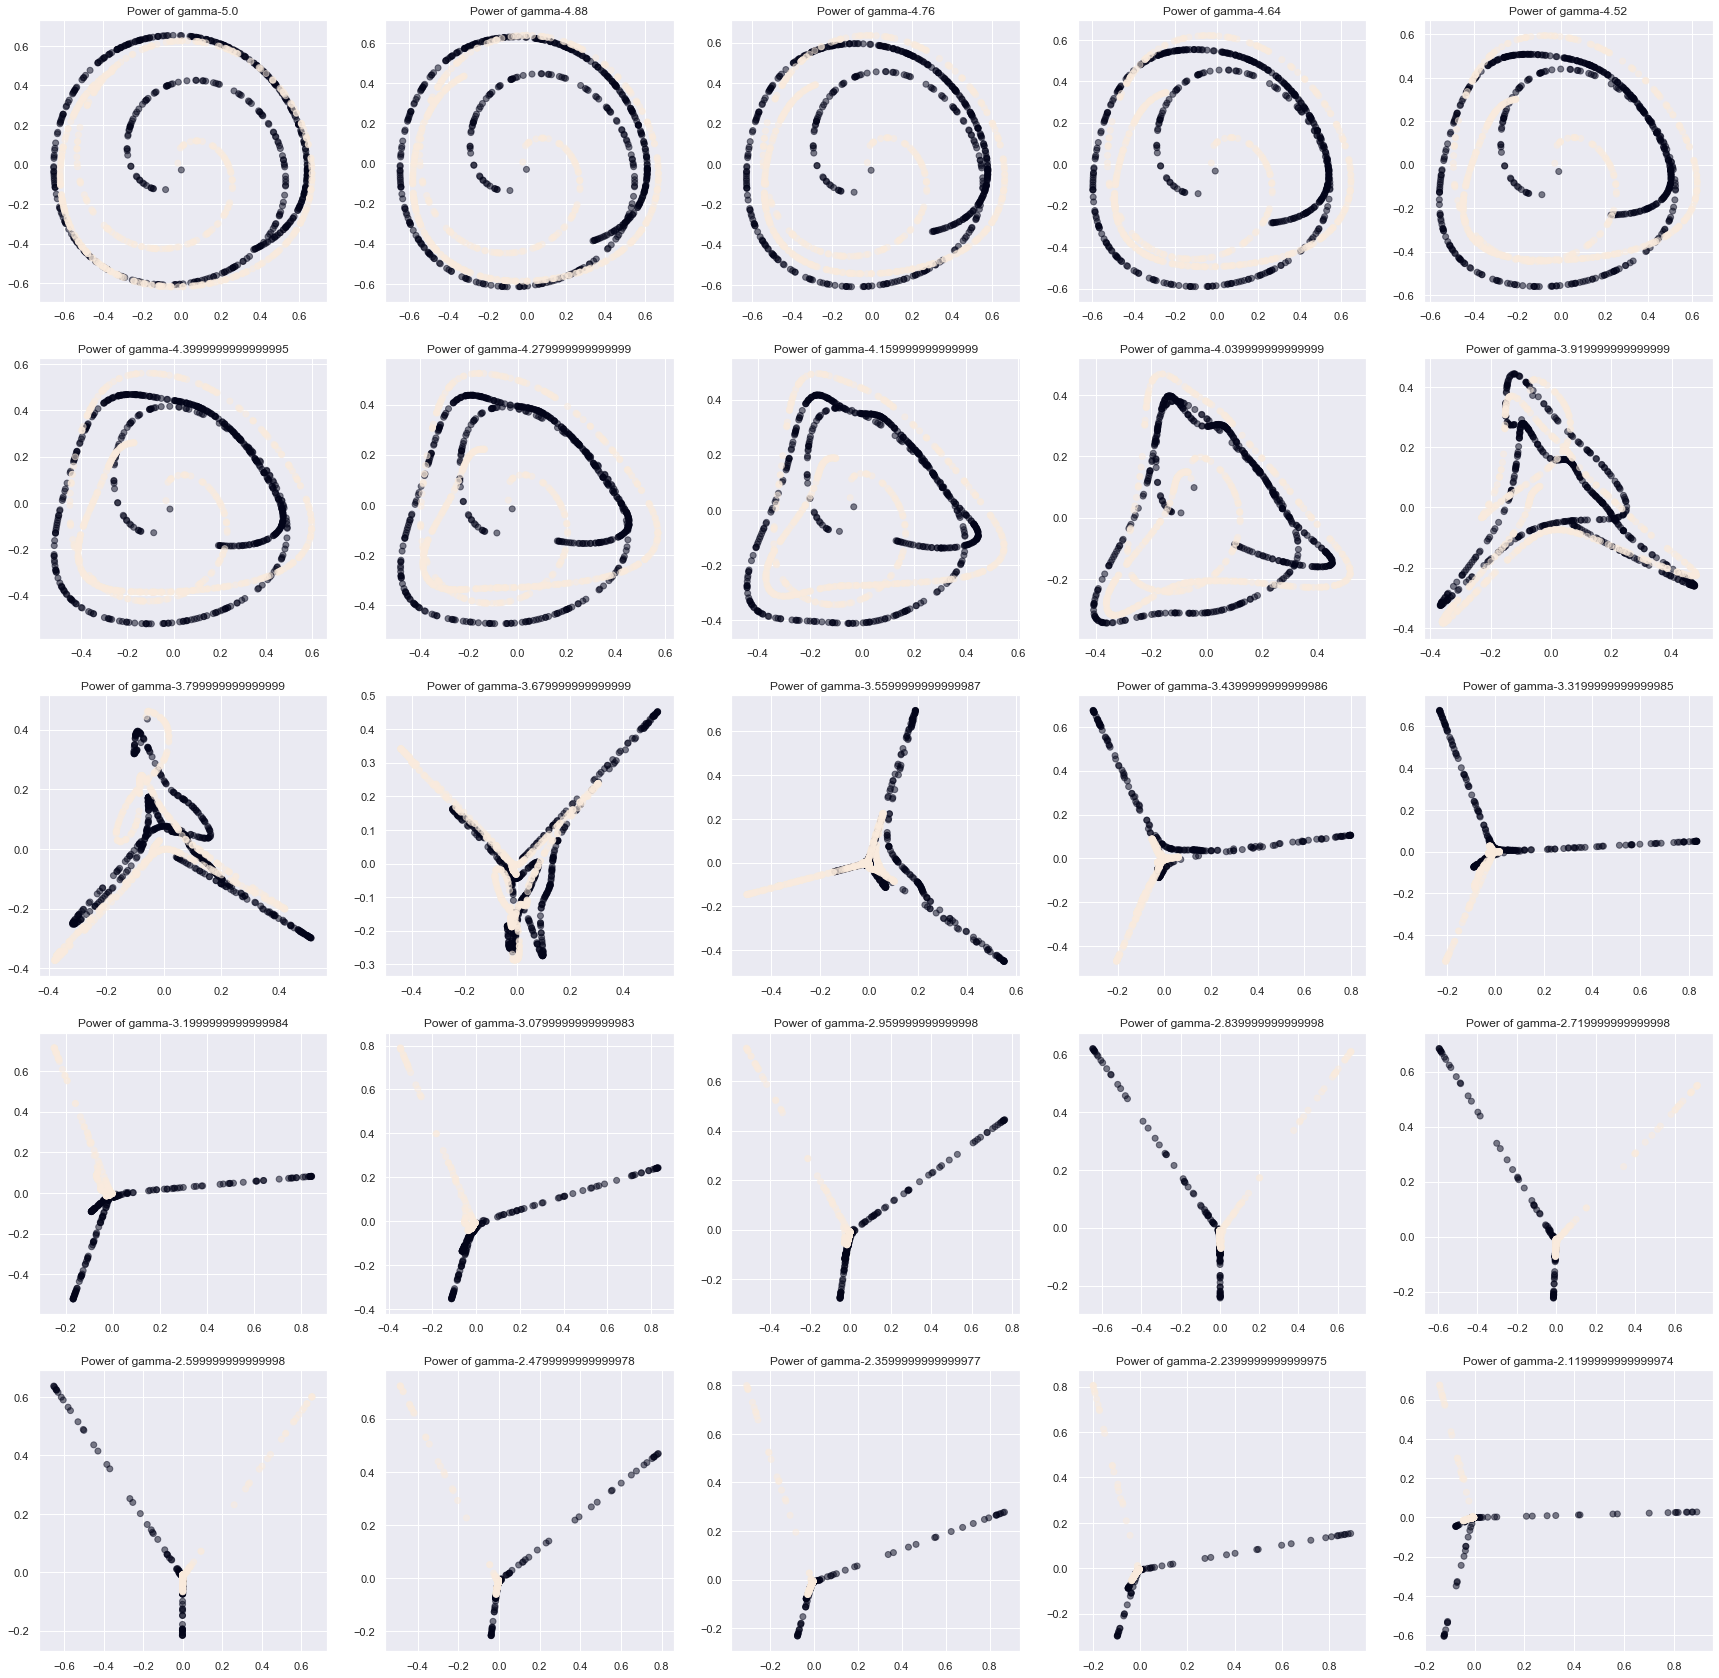

In [122]:
g_start = -5
g_end = -2
g_power = np.arange(g_start, g_end, (g_end - g_start)/25)

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30), sharex=False, sharey=False)

for n, ax in enumerate (axs.flatten()):
    g_value = 10 ** g_power[n]
    scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=g_value)
    X_skernpca = scikit_kpca.fit_transform(X4)
    ax.scatter(X_skernpca[:,0], X_skernpca[:,1], c=y4, alpha=0.5)
    ax.set_title('Power of gamma' + str(g_power[n]), size = 12)

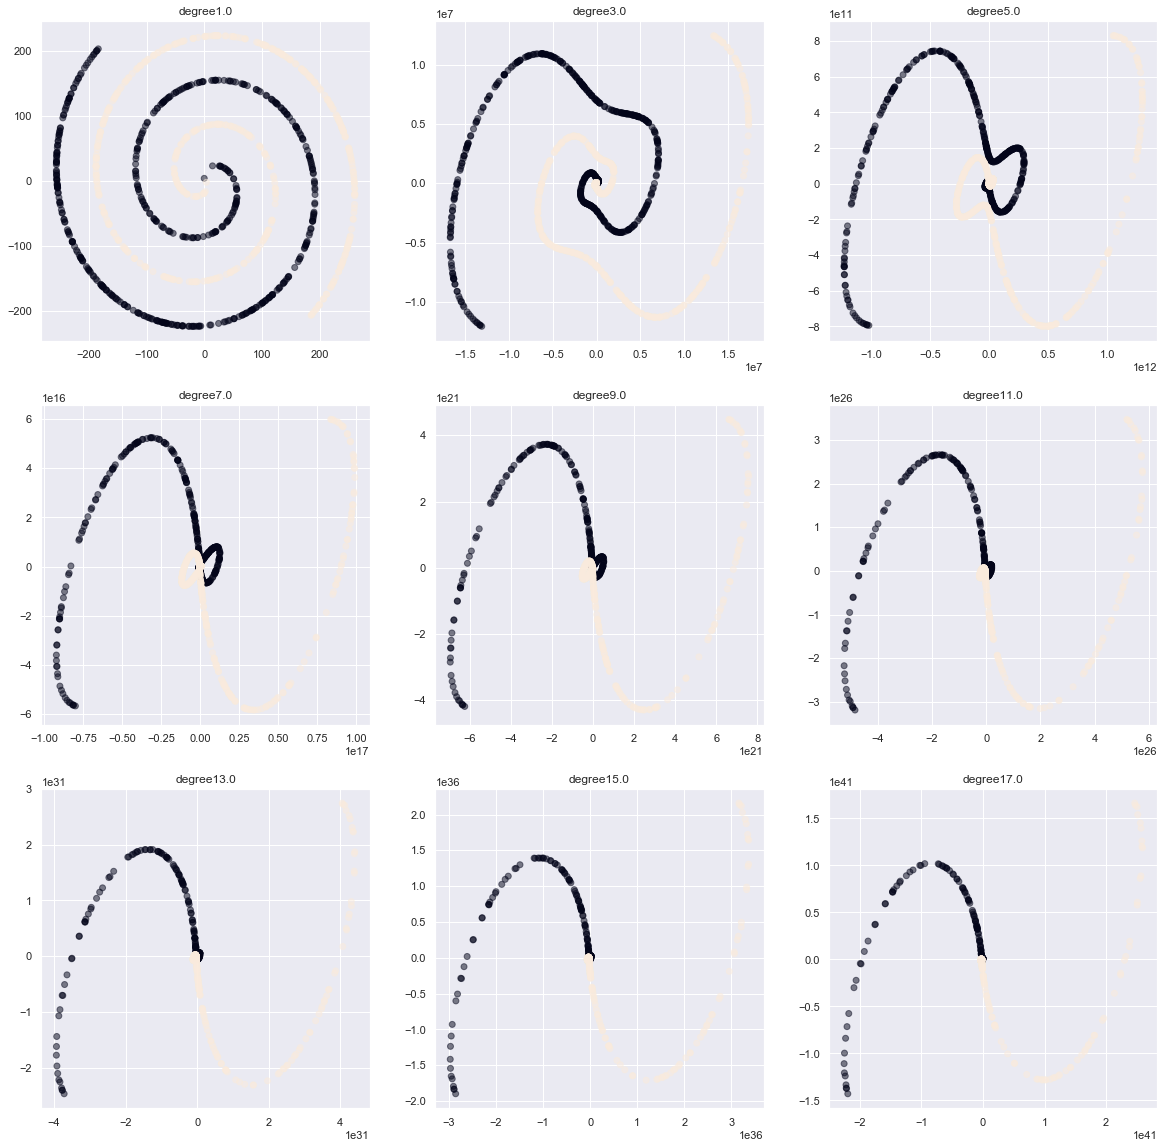

In [128]:
g_start = 1
g_end = 19
g_power = np.arange(g_start, g_end, (g_end - g_start)/9)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=False, sharey=False)

for n, ax in enumerate (axs.flatten()):
    g_value = 10 ** (g_power[n])
    scikit_kpca = KernelPCA(n_components=2, kernel='poly', degree=g_power[n])
    X_skernpca = scikit_kpca.fit_transform(X4)
    ax.scatter(X_skernpca[:,0], X_skernpca[:,1], c=y4, alpha=0.5)
    ax.set_title('degree' + str(g_power[n]), size = 12)

두 모델 모두 애매하게 분류하는 모습을 보여준다.